In [1]:
import environ

env = environ.Env()
environ.Env.read_env()
DataSetsPath     = env('DataSetsPath')     #* get the path of the script
ModelsPath       = env('ModelsPath')       #* get the path of the script
FitFunctionsPath = env('FitFunctionsPath') #* get the path of the script
DataPath         = env('DataPath')         #* get the path of the data


import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(FitFunctionsPath)


import torch
import torchvision.transforms as transforms
from DataSets.dataSetCatsVsDogs import DataSet_Img_To_Label

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:

from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler


resize_image = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((250, 250)),
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])

root_Data     = DataPath + "train/train"
root_Data_Val = DataPath + "test1/test1"
myDataSet     = DataSet_Img_To_Label(root_Data, resize_image, test = False, dataSize = 1000)
myDataSetTest = DataSet_Img_To_Label(root_Data, resize_image, test = False)
myDataSetValy = DataSet_Img_To_Label(root_Data_Val, resize_image, test = True, dataSize = 1000)
print("myDataSet     = ", myDataSet)
print("myDataSetTest = ", myDataSetTest)
print("myDataSetTest = ", myDataSetValy)



random_sampler = RandomSampler(myDataSet)
batch_size = 64
# sampler = random_sampler 
my_Data_Loader      = DataLoader(myDataSet    , batch_size = batch_size, num_workers = 0,  shuffle = True)
my_Data_Loader_test = DataLoader(myDataSetTest, batch_size = 4, num_workers = 0,  shuffle = True)
my_Data_Loader_Val  = DataLoader(myDataSetValy, batch_size = batch_size, num_workers = 0,  shuffle = True)

images.size() =  25000
images.size() =  25000
images.size() =  1000
myDataSet     =  len(dataSet) =  25000
dataSet[0]   =  ('cat.0.jpg', 1)

myDataSetTest =  len(dataSet) =  25000
dataSet[0]   =  ('cat.0.jpg', 1)

myDataSetTest =  len(dataSet) =  1000
dataSet[0]   =  ('1.jpg', '0')



In [3]:
import matplotlib.pyplot as plt
import numpy as np
from Models.modelCatsVsDogs import modelCNN2
from Models.modelCatsVsDogs import Cnn



# myModel = Cnn()
myModel = modelCNN2()

myModel.to(device = device)

# print(myModel.state_dict().keys())
# weights = myModel.state_dict()['conv_1.weight']

# # Get the number of filters and channels
# num_filters = weights.shape[0]
# num_channels = weights.shape[1]

# # Create subplots for each filter
# fig, axs = plt.subplots(num_filters, num_channels, figsize=(10, 10))

# # Plot each filter
# for i in range(num_filters):
#     for j in range(num_channels):
#         axs[i, j].imshow(weights[i, j].cpu().detach().numpy(), cmap='viridis')
#         axs[i, j].axis('off')

# plt.tight_layout()
# plt.show()



modelCNN2(
  (Sect_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Sect_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Sect_3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flat_1): Linear(in_features=576, out_features=10, bias=True)
  (dens_1): Sequential(
    (0): Linear(in_features=10, out_features=2, bias=True)
  )
  (Relu): R

In [4]:

#* test train_modelCNN
from FitFunctions.fitFunctionsForCatsVsDogs import train_modelCNN
import torch.nn as nn
from torch import optim
import torch.nn.functional as F


# opt_model = optim.Adam(myModel.parameters(), lr = 0.01)
opt_model = optim.Adam(myModel.parameters(), lr = 0.001)
# criterion = nn.BCELoss()
# criterion = torch.nn.MSELoss()

criterion = nn.CrossEntropyLoss()
getValLoos = True
history = train_modelCNN(my_Data_Loader, myModel, opt_model, device = device, num_epochs = 10, get_History = True, criterion = criterion, getValLoos = getValLoos, data_loader_Val = my_Data_Loader)
# history = train_step(myModel, my_Data_Loader, criterion, opt_model)
# history = train_model(myModel, my_Data_Loader, criterion, opt_model, device = device, num_epochs = 1)
# print(myModel.state_dict().keys())
# weights = myModel.state_dict()['dens_1.4.weight'] 



Epoch 1/10 process: 99: 100%|██████████| 391/391 [02:03<00:00,  3.16it/s, modelLoss=0.377]


Epoch completed, Average Loss: 0.5195
Epoch completed, Average Test Loss: 0.4270


Epoch 2/10 process: 99: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s, modelLoss=0.434]


Epoch completed, Average Loss: 0.4145
Epoch completed, Average Test Loss: 0.3552


Epoch 3/10 process: 99: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s, modelLoss=0.333]


Epoch completed, Average Loss: 0.3649
Epoch completed, Average Test Loss: 0.3474


Epoch 4/10 process: 99: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s, modelLoss=0.485]


Epoch completed, Average Loss: 0.3270
Epoch completed, Average Test Loss: 0.2765


Epoch 5/10 process: 99: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s, modelLoss=0.387]


Epoch completed, Average Loss: 0.2944
Epoch completed, Average Test Loss: 0.2520


Epoch 6/10 process: 99: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s, modelLoss=0.296]


Epoch completed, Average Loss: 0.2626
Epoch completed, Average Test Loss: 0.2144


Epoch 7/10 process: 99: 100%|██████████| 391/391 [00:58<00:00,  6.74it/s, modelLoss=0.456]


Epoch completed, Average Loss: 0.2322
Epoch completed, Average Test Loss: 0.1921


Epoch 8/10 process: 99: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s, modelLoss=0.194] 


Epoch completed, Average Loss: 0.2047
Epoch completed, Average Test Loss: 0.1600


Epoch 9/10 process: 99: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s, modelLoss=0.205] 


Epoch completed, Average Loss: 0.1854
Epoch completed, Average Test Loss: 0.1373


Epoch 10/10 process: 99: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s, modelLoss=0.141] 


Epoch completed, Average Loss: 0.1682
Epoch completed, Average Test Loss: 0.1275


In [8]:


# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming `weights` is your tensor with shape (out_channels, in_channels, kernel_size, kernel_size)
# weights = myModel.state_dict()['Sect_3.1.weight']
# # weights = myModel.state_dict()['conv_3.weight']

# # Get the number of filters and channels
# num_filters = weights.shape[0]
# num_channels = weights.shape[1]

# # Create subplots for each filter
# fig, axs = plt.subplots(num_filters, num_channels, figsize=(10, 10))

# # Plot each filter
# for i in range(num_filters):
#     for j in range(num_channels):
#         axs[i, j].imshow(weights[i, j].cpu().detach().numpy(), cmap='viridis')
#         axs[i, j].axis('off')

# plt.tight_layout()
# plt.show()


# # Get the number of filters and channels
# num_filters = weights.shape[0]
# num_channels = weights.shape[1]

# # Create subplots for each filter
# fig, axs = plt.subplots(num_filters, num_channels, figsize=(10, 10))

# # Plot each filter
# for i in range(num_filters):
#     for j in range(num_channels):
#         axs[i, j].imshow(weights[i, j].cpu().detach().numpy(), cmap='viridis')
#         axs[i, j].axis('off')

# plt.tight_layout()
# plt.show()


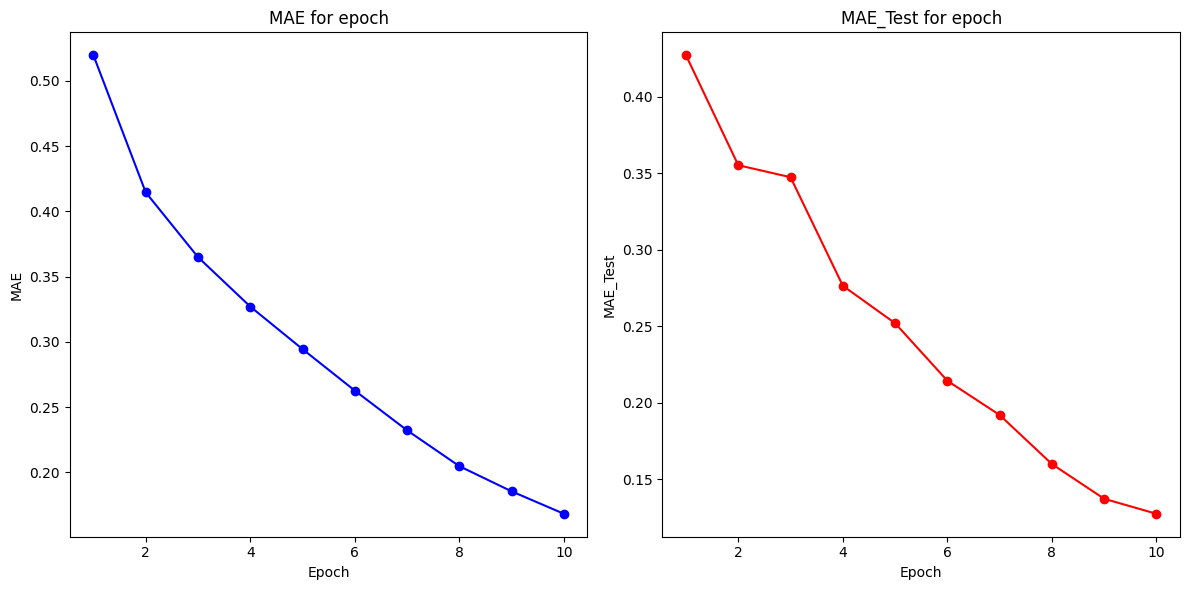

In [11]:
import matplotlib.pyplot as plt

Epochs_values     = range(1, len(history['MAE']) + 1)
Epochs_values_Val = range(1, len(history['MAE_Test']) + 1)

# Create two subplots (one for MAE and one for MAE_Test) in a single row
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot MAE in the first subplot
plt1.plot(Epochs_values, history['MAE'], marker='o', color='blue')
plt1.set_xlabel('Epoch')
plt1.set_ylabel('MAE')
plt1.set_title('MAE for epoch')

# Plot MAE_Test in the second subplot
plt2.plot(Epochs_values_Val, history['MAE_Test'], marker='o', color='red')
plt2.set_xlabel('Epoch')
plt2.set_ylabel('MAE_Test')
plt2.set_title('MAE_Test for epoch')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


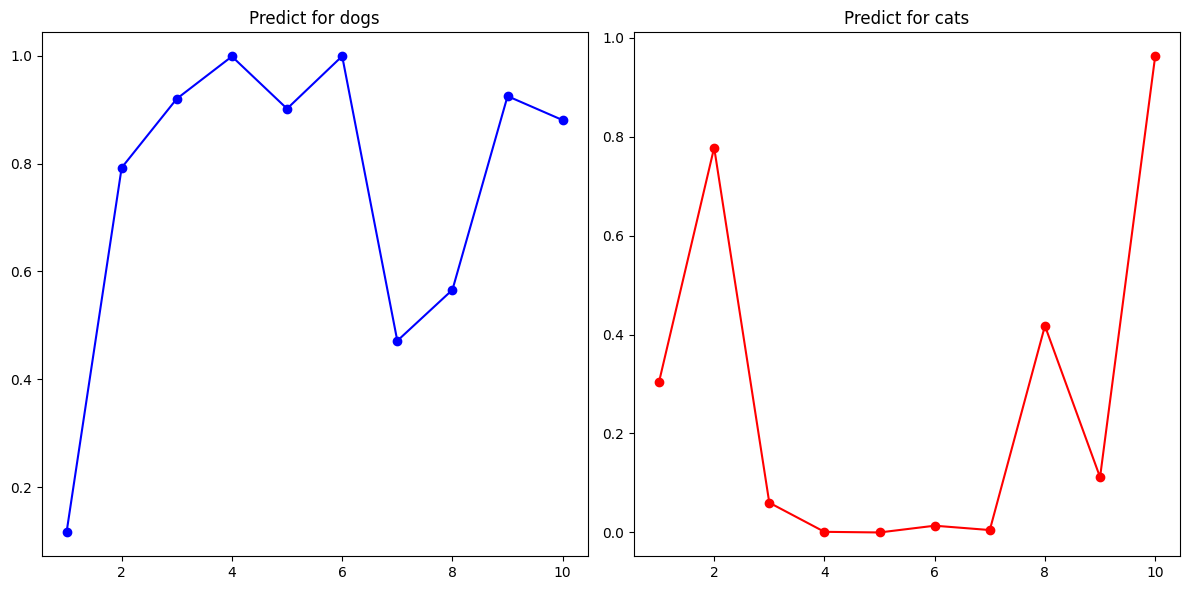

In [14]:
import numpy as np
import os
from PIL import Image

img_pth = "C:/Users/malekir1/Documents/dataSets/dogs-vs-cats/train/train/"
# img_pth = root_Data

dog_paths = ['dog.70.jpg', 'dog.71.jpg', 'dog.72.jpg', 'dog.73.jpg', 'dog.74.jpg', 'dog.75.jpg', 'dog.76.jpg',
             'dog.77.jpg', 'dog.78.jpg', 'dog.79.jpg']

cat_paths = ['cat.170.jpg', 'cat.171.jpg', 'cat.172.jpg', 'cat.173.jpg', 'cat.174.jpg', 'cat.175.jpg', 'cat.176.jpg',
             'cat.177.jpg', 'cat.178.jpg', 'cat.179.jpg']

def getArrayBatch(paths):

    tensor_batch = []
    for path in paths:
        img  = os.path.join(img_pth + path)
        img  = np.array(Image.open(img))
        img  = img [:, :, :3]
        img = resize_image(img)
        tensor_batch.append(img)

    tensor_batch = torch.stack(tensor_batch).cuda()
    tensor_batch = myModel(tensor_batch)
    tensor_batch = torch.softmax(tensor_batch, dim=1)[:, 0].cpu().detach().numpy()  # Extract probability for the positive class
    # tensor_batch = tensor_batch.cpu().detach().numpy()
    return tensor_batch

predict_Array_dogs = getArrayBatch(dog_paths)
predict_Array_cats = getArrayBatch(cat_paths)

import matplotlib.pyplot as plt

num_images_dogs     = range(1, len(predict_Array_dogs) + 1)
num_images_cats = range(1, len(predict_Array_dogs) + 1)

fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

plt1.plot(num_images_dogs, predict_Array_dogs, marker='o', color='blue')
plt1.set_title('Predict for dogs')
plt2.plot(num_images_cats, predict_Array_cats, marker='o', color='red')
plt2.set_title('Predict for cats')

plt.tight_layout()
plt.show()



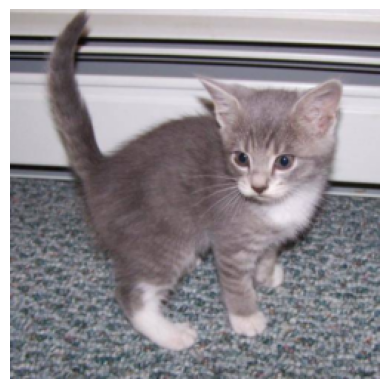

array([0.00315056], dtype=float32)

In [15]:
# TODO use the model 
import os
from PIL import Image

img_pth = DataPath + "train/train/cat.173.jpg"

img  = os.path.join(img_pth)
img  = np.array(Image.open(img))
img  = img [:, :, :3]
img  = resize_image(img)


img_array = img.permute(1, 2, 0).numpy()  # Assuming the tensor is of shape [3, height, width]
# Plot the image
img = img.unsqueeze(0)
plt.imshow(img_array)
plt.axis('off')  # Turn off axis
plt.show()

torch.softmax(myModel(img.cuda()), dim=1)[:, 0].cpu().detach().numpy()
